<a href="https://colab.research.google.com/github/Dombau0/TMDL_assignments/blob/main/TMDL_2024_25_Assignment_3%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/code turing/tmdb_5000_movies.csv')
df

Mounted at /content/drive


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

*The columns "homepage", "overview", "release_date", "runtime", and "tagline" seem to have at least one null value. Missing values such as the release data could be looked up in the internet and filled in. Otherwise, missing values could also be replaced by the mean or some other measure, for the runtime, for example. A third option is to just drop the observations with missing values.*

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [4]:
df = df[["title", "overview", "genres"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [5]:
df = df.dropna()
df = df.reset_index(drop = True)

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [6]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 13287.07it/s]


Verify that one-hot encodings are indeed as expected

In [7]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

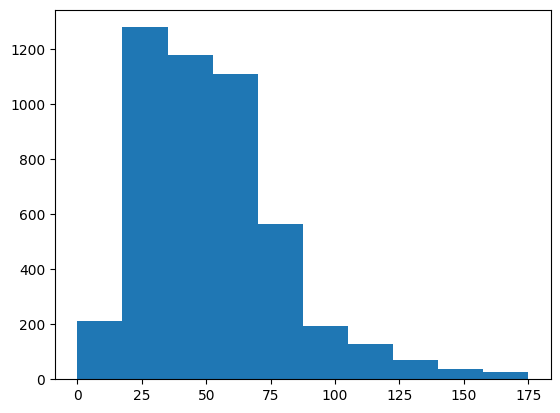

0
175


In [8]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

def to_lowercase(text):
    """ Converts text to lowercase"""
    return text.lower()

# loop over df, remove punctuation, make words lowercase and add it to a new column
processed_overviews = []
for index, row in df.iterrows():
    no_punct = remove_punctuation(row["overview"])
    processed_overviews.append(to_lowercase(no_punct))

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for index, row in df.iterrows():
    overview_lens.append(len(row["overview"].split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(df["overview_len"])
plt.show()

print(min(df["overview_len"]))
print(max(df["overview_len"]))

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

*The shortest overview has length 0 and the longest overview has length 175. In order to find the exact optimum for this optimization problem, it would be best to just run a constrained optimization maximizing the number of words stored while minimizing the number of movies dropped. If I would have to guess, I would probably pick a number between 25 and 50.*

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [9]:
token_len = 15
df = df.loc[df["overview_len"] > token_len]

df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))
df

<ipython-input-9-1b67371b9edb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [10]:
unique_words = set()
for overview in df["proc_overview"]:
    unique_words.update(overview.split())

sorted_vocab = sorted(list(unique_words))
vocab_len = len(sorted_vocab)
print(vocab_len)

12436


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [11]:
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = []
    for word in row["proc_overview"].split():
        sentence_encode.append(encode_labels(word, sorted_vocab))
    sentence_encode = [sum(x) for x in zip(*sentence_encode)]
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview']

100%|██████████| 4676/4676 [02:35<00:00, 30.11it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4794,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4795,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4797,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

*In total, we have 4,676 rows. Furthermore, there are 12,436 unique words as can be seen in exercise Q2.2.3. Each float takes up 16 bytes. Hences, theoretically, this takes 4,676 x 12,436 x 16 = 930,411,776 bytes to store.*

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

<ipython-input-12-2854fedc4c32>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], cmap='tab10', alpha=0.6, s=1)


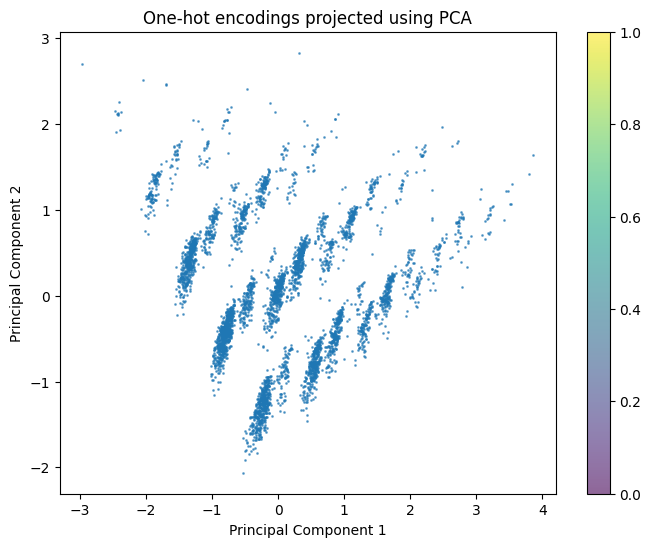

In [12]:
# Import PCA decomposition class from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set up PCA object
data = np.array(df["one_hot_overview"].tolist())

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(data)

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('One-hot encodings projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

*The scatter exhibits multiple clusters of points, some of which seem to be on a straight line. The clusters in general could indicate that many movies in one particular genre, for example, have many of the same words in the one-hot encoding. Furthermore, there seems to be a strong correlation between the two principal components when looking at several subsets of the encoding data.*

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

*Judging by the plot obtained in question 3.4, we can see that two principal components explain around 12% of variance cumulatively. For 10 principal components, the amount of variance explained is at around 23%. So, the 2D PCA projection loses around half of its cumulatively explained variance for this dataset when compared to the initial 10 PCAs.*

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

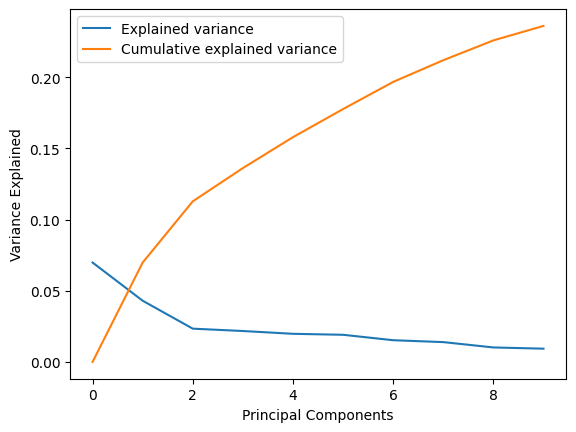

In [13]:
pca = PCA(n_components = 10)
x_train_pca = pca.fit_transform(data)

powers = pca.explained_variance_ratio_

plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers))], label="Cumulative explained variance")
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [14]:
pca = PCA(n_components = 1300)
pca.fit(data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_variance >= 0.80)
print(num_components)

(array([1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248,
       1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292,
       1293, 1294, 1295, 1296, 1297, 1298, 1299]),)


*Since the indexing starts at 0, we find that we need 1239 principal components in order to explain 80% of the total variance in the data.*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [16]:
n_dims = 1239
pca = PCA(n_components = n_dims)
labels_pca = pca.fit_transform(data)
df["overview_pca"] = list(labels_pca.tolist())

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [17]:
# import KMeans class
from sklearn.cluster import KMeans

# perform K-means clustering
pca_features = np.array(df["overview_pca"].tolist())
kmeans = KMeans(n_clusters = 20)
kmeans.fit(pca_features)

# store predicted clusters
y_preds = kmeans.predict(pca_features)
df["cluster_kmeans"] = y_preds

# print out elements of cluster 0
print(df[df["cluster_kmeans"] == 0])

                             title  \
24                       King Kong   
238   Teenage Mutant Ninja Turtles   
283     The Taking of Pelham 1 2 3   
298        The Wolf of Wall Street   
355     Die Hard: With a Vengeance   
...                            ...   
4664                       Urbania   
4670            She Done Him Wrong   
4711      An American in Hollywood   
4783              Breaking Upwards   
4798              Shanghai Calling   

                                               overview  \
24    In 1933 New York, an overly ambitious movie pr...   
238   The city needs heroes. Darkness has settled ov...   
283   Armed men hijack a New York City subway train,...   
298   A New York stockbroker refuses to cooperate in...   
355   New York detective John McClane is back and ki...   
...                                                 ...   
4664  Charlie takes an odyssey through grief during ...   
4670  New York singer and nightclub owner Lady Lou h...   
4711  A tale

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

*While there are multiple action-heavy movies that would fit well together, there are some with other topics as well. Overall, most of the movies go well together based on my movie watching history, but some of them are outliers.*

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*Within-cluster sum of squares decreases significantly for the first 3 clusters, after that the decline starts slowing down. Therefore, using the elbow method, I would choose 3 clusters in this case.*

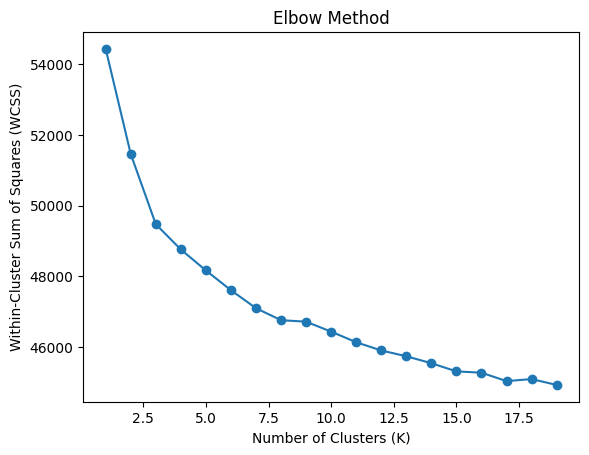

In [18]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [20]:
# import GMM class
from sklearn.mixture import GaussianMixture

# perform K-means clustering
gmm = GaussianMixture(20)
gmm.fit(pca_features)

# predict the cluster for the selected data point
y_preds = gmm.predict(pca_features)
df["cluster_gmm"] = y_preds

# print out elements of cluster 0
print(df[df["cluster_gmm"] == 0])

                                    title  \
35    Transformers: Revenge of the Fallen   
38               The Amazing Spider-Man 2   
45                            World War Z   
94                Guardians of the Galaxy   
167                                Sahara   
...                                   ...   
4678                         Reality Show   
4682         The Case of the Grinning Cat   
4685                   The Man from Earth   
4704             When the Lights Went Out   
4715                    A Dog's Breakfast   

                                               overview  \
35    Sam Witwicky leaves the Autobots behind for a ...   
38    For Peter Parker, life is busy. Between taking...   
45    Life for former United Nations investigator Ge...   
94    Light years from Earth, 26 years after being a...   
167   Scouring the ocean depths for treasure-laden s...   
...                                                 ...   
4678  The Warwick family are unknowingly being

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

*Also in this clustering, there are some movies that would go well together, which are mainly action/adventure movies. However, also other genres such as comedy are present which do not really fit into that scheme well. In that sense, it is very similar to the K-Means Clustering where also some movies fit well with one another while there were some outliers.*

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

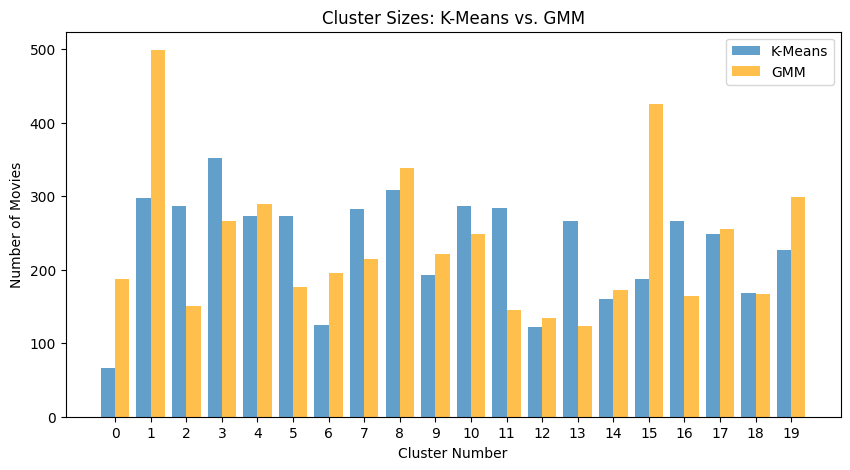

In [22]:
# Count cluster sizes
kmeans_counts = df["cluster_kmeans"].value_counts().sort_index()
gmm_counts = df["cluster_gmm"].value_counts().sort_index()

# Create a double bar plot
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4  # Width of the bars

# Plot the clusters
clusters = np.arange(len(kmeans_counts))
ax.bar(clusters - width/2, kmeans_counts, width=width, label="K-Means", alpha=0.7)
ax.bar(clusters + width/2, gmm_counts, width=width, label="GMM", alpha=0.7, color='orange')

# Format the double bar plot
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Number of Movies")
ax.set_title("Cluster Sizes: K-Means vs. GMM")
ax.set_xticks(clusters)
ax.legend()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

*There seem to be significant differences in the size of the clusters for both K-Means and GMM. However, the difference in cluster size is more severe for the GMM, where the cluster with index 1 really stands out. One potential reason for this could be that genres like adventure or action or science-fiction have vastly more movies categorized in them than other less popular genres. This in turn could lead to substantially different cluster sizes.*

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [24]:
prev_watch = "Avatar"

# Find the cluster index for Avatar in both K-Means and GMM
cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].values[0]
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].values[0]

# Get recommendations from the same K-Means cluster
kmeans_recommendations = df[df["cluster_kmeans"] == cluster_kmeans]["title"].tolist()
kmeans_recommendations.remove(prev_watch)

# Get recommendations from the same GMM cluster
gmm_recommendations = df[df["cluster_gmm"] == cluster_gmm]["title"].tolist()
gmm_recommendations.remove(prev_watch)

# Print recommendations
print("Movies recommended based on K-Means clustering:")
print(kmeans_recommendations[:10])

print("\nMovies recommended based on GMM clustering:")
print(gmm_recommendations[:10])

Movies recommended based on K-Means clustering:
['The Jungle Book', 'Shin Godzilla', 'Poseidon', 'Charlie and the Chocolate Factory', 'Angels & Demons', 'The Revenant', 'R.I.P.D.', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Django Unchained', 'Epic']

Movies recommended based on GMM clustering:
['John Carter', 'Titanic', 'X-Men: The Last Stand', 'Oz: The Great and Powerful', 'Wild Wild West', 'The Jungle Book', 'The Polar Express', 'I Am Legend', 'X-Men Origins: Wolverine', 'Happy Feet Two']


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

*Overall, I would say that both recommender systems are pretty good. Both of them mostly get the gist of the movie right and recommend similar movies that are mostly also action or adventure movies. I would use some of them if my real dentist asked for a movie suggestion.*

**Q6.3** How would you try making the recommender systems better?

*One could try to use other recommender systems which are not based on the Euclidian distance but other measures of similarity like cosine similarity. Additionally, one could also try to increase the number of words incorporated in the overview, which would reduce the number of included movies but may have benefits for the quality of recommendations of the recommender system.*

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

*You could figure out all the clusters where these movies come from for both GMM and K-Means. Then one could recommend the ones that are in multiple clusters and make sure that all of the genres that were liked by the dentist are included in the recommendation list. Additionally, some kind of weighting can be introduced to incorporate the amount of movies from each cluster that the dentist watched.*

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [28]:
def cosine_sim(v1, v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"] == prev_watch]["overview_pca"].tolist()

sims = []
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by = "cos_sim_to_avatar", ascending = False)
df.head()

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17345382462948228, 1.26098557117617, 1.0605...",19,9,[1.0000000000000002]
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a warlock flees from the 17th to the 20th cent...,122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14665351536259097, 1.1982716633050972, 1.01...",19,9,[0.5373564836089609]
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sam ellis is a man on the rise a hotshot feder...,50,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21569425821042298, 1.415803158205601, 0.513...",12,18,[0.47394127186237484]
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the nomad is a historical epic set in 18thcent...,39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2514730378667991, 1.4271204215389064, 0.322...",2,4,[0.46747758612338214]
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the future america is a dystopian wasteland...,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23248274972346164, 1.409116372478233, 0.348...",2,4,[0.45476165489610376]


*The movies that are suggested now are very different from the movies that K-Means and GMM recommended. None of the movies suggested here were in the lists suggested for the other two recommender systems. Since all of these movies are also Action or Adventure movies, I would say that the movies recommended here are very solid and fit Avatar well.*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [30]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))
print(df_train)

3740 936
                                   title  \
0                                Hayride   
1                              Red Tails   
2                 Lars and the Real Girl   
3                          Obvious Child   
4                              Pinocchio   
...                                  ...   
3735                   Finding Forrester   
3736                  Madea Goes to Jail   
3737             xXx: State of the Union   
3738                           The Dress   
3739  Escape from the Planet of the Apes   

                                               overview  \
0     A college student returning home for Halloween...   
1     The story of the Tuskegee Airmen, the first Af...   
2     Sometimes you find love where you'd least expe...   
3     An immature, newly unemployed comic must navig...   
4     Lonely toymaker Geppetto has his wishes answer...   
...                                                 ...   
3735  Gus van Sant tells the story of a young Afr

## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [32]:
# Import additional packages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC
import seaborn as sns
import time

# Set the training and testing data
train_X = df_train['overview_pca'].tolist()
train_y = df_train['one_hot_genres'].tolist()
test_X = df_test['overview_pca'].tolist()
test_y = df_test['one_hot_genres'].tolist()

# Define a function to train and evaluate the model
def train_and_eval(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Measure training time
    start_time = time.time()
    grid_search.fit(train_X, train_y)
    train_time = (time.time() - start_time) / len(train_X)

    # Get best model
    best_model = grid_search.best_estimator_

    # Measure inference time
    start_time = time.time()
    y_pred = best_model.predict(test_X)
    inference_time = (time.time() - start_time) / len(test_X)

    # Calculate scores
    train_score = accuracy_score(train_y, best_model.predict(train_X))
    test_score = accuracy_score(test_y, y_pred)

    print(f"Train Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print(f"Mean Training Time: {train_time:.6f} sec")
    print(f"Mean Inference Time: {inference_time:.6f} sec")

    return best_model, y_pred

# Train and optimize a Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
modelRFC = RFC()
best_model, y_pred = train_and_eval(modelRFC, param_grid)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix")
plt.show()

KeyboardInterrupt: 

  0%|          | 0/2 [00:00<?, ?it/s]

0.0


 50%|█████     | 1/2 [00:04<00:04,  4.24s/it]

0.0
0.0


100%|██████████| 2/2 [00:08<00:00,  4.32s/it]

0.0


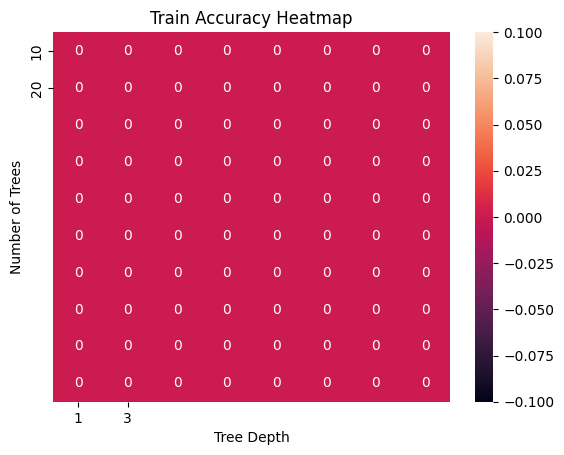

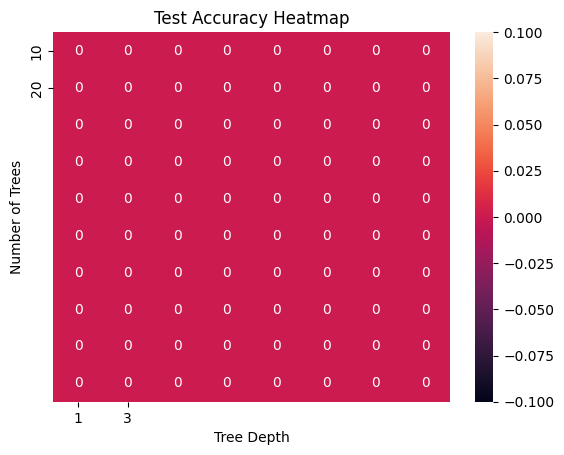

In [43]:
# Set the training and testing data
#train_X = df_train['overview_pca']
#train_y = df_train['one_hot_genres']
#test_X = df_test['overview_pca']
#test_y = df_test['one_hot_genres']

train_X = np.array(df_train['overview_pca'].tolist())
test_X = np.array(df_test['overview_pca'].tolist())
train_y = np.array(df_train['one_hot_genres'].tolist())
test_y = np.array(df_test['one_hot_genres'].tolist())

train_acc = np.zeros((10, 8))
test_acc = np.zeros((10, 8))

n_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
depths = [1, 3, 5, 7, 9, 11, 13, 15]

n_trees = [10, 20]
depths = [1, 3]

for tree_idx, n_tree in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        modelRFC = RFC(n_tree, max_depth = d)
        modelRFC = modelRFC.fit(train_X, train_y)

        print(modelRFC.score(train_X, train_y))

        train_acc[tree_idx][d_idx] = modelRFC.score(train_X, train_y)
        test_acc[tree_idx][d_idx] = modelRFC.score(test_X, test_y)

plt.figure()
sns.heatmap(train_acc, annot = True, xticklabels = depths, yticklabels = n_trees)
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.title("Train Accuracy Heatmap")
plt.show()

plt.figure()
sns.heatmap(test_acc, annot = True, xticklabels = depths, yticklabels = n_trees)
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.title("Test Accuracy Heatmap")
plt.show()

In [42]:
train_X
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)